In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date


In [2]:
#import dataset
with pd.ExcelFile(r'C:\Users\Victordanok\Desktop\Projects\Customer Segmentation\KPMG_VI_New_raw_data_update_final.xlsx') as reader:
    trans = pd.read_excel(reader, sheet_name = 'Transactions', header = 1)
    ncl = pd.read_excel(reader, sheet_name = 'NewCustomerList', header = 1)
    cdem = pd.read_excel(reader, sheet_name = 'CustomerDemographic', header = 1)
    cadd = pd.read_excel(reader, sheet_name = 'CustomerAddress', header = 1)

## Customer demographic dataset

In [3]:
cdem.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [4]:
cdem.describe()

customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000

In [5]:
cadd.describe()

customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [6]:
trans.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  
count   19803.000000  
mean      556.046951  
std       405.955660  
min         7.210000  
25%       215.140000  
50%       507.580000  
75%       795.100000  
max      1759.850000

In [7]:
#calculate the age from DOB

import datetime as dt
today = dt.datetime.today().year
cdem['age'] = today - cdem['DOB'].dt.year


In [8]:
cdem.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
age                                      56
dtype: int64

In [9]:
cdem.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [10]:
#replacing

cdem['gender'].replace(to_replace =['M','F','Femal'], value =['Male', 'Female', 'Female'], inplace = True)

In [11]:
cdem.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [12]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [13]:
passed_on = cdem[cdem['deceased_indicator'] == 'Y'].index

In [14]:
cdem.drop(passed_on, inplace = True)

In [15]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3873 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3911 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3342 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   deceased_indicator                   3998 non-null   object        
 10  default     

<AxesSubplot:>

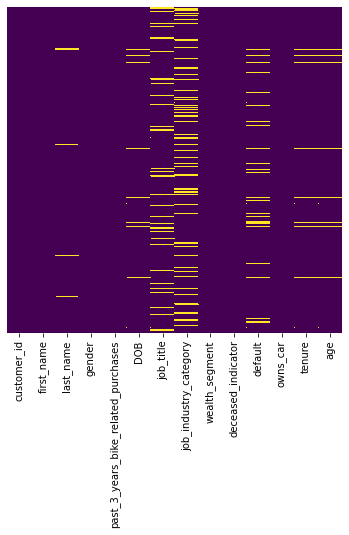

In [16]:
#check for null values
plt.figure(figsize=(6, 6))
sns.heatmap(cdem.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
#fill in the null values

cdem['age'] = cdem['age'].fillna(cdem.age.mode()[0])
cdem['tenure'] = cdem['tenure'].fillna(cdem.tenure.mode()[0])

In [18]:
cdem.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

In [19]:
cdem.drop(['default', 'last_name', 'DOB'], axis = 1, inplace = True)

In [20]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3998 non-null   int64  
 1   first_name                           3998 non-null   object 
 2   gender                               3998 non-null   object 
 3   past_3_years_bike_related_purchases  3998 non-null   int64  
 4   job_title                            3492 non-null   object 
 5   job_industry_category                3342 non-null   object 
 6   wealth_segment                       3998 non-null   object 
 7   deceased_indicator                   3998 non-null   object 
 8   owns_car                             3998 non-null   object 
 9   tenure                               3998 non-null   float64
 10  age                                  3998 non-null   float64
dtypes: float64(2), int64(2), objec

## Customer Address dataset

In [21]:
cadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [22]:
cadd.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [23]:
#check for the number of unique entries
cadd.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [24]:
cadd.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [25]:
#adding up the duplicated info
cadd.replace(to_replace = ['New South Wales', 'Victoria'], value = ['NSW', 'VIC'], inplace = True)

In [26]:
#check the replaced value count
cadd.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

<AxesSubplot:>

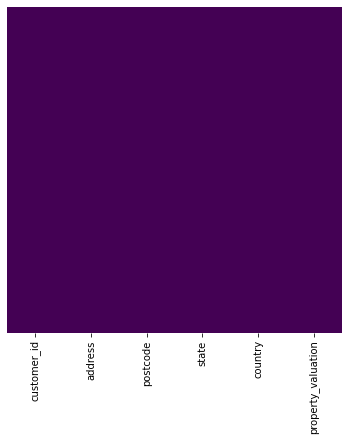

In [27]:
#heatmap showing null values

plt.figure(figsize=(6, 6))
sns.heatmap(cadd.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

## Transactions Dataset

In [28]:
trans.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-02  
1     2091.47         388.92              2014-03-03  
2     1793.43         248.82              1999-07-20  
3     1198.46         381.10              1998-12-16  
4     1765.30         709.48              2015-08-10

In [29]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [30]:
trans.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-02  
1     2091.47         388.92              2014-03-03  
2     1793.43         248.82              1999-07-20  
3     1198.46         381.10              1998-12-16  
4     1765.30         709.48              2015-08-10

In [31]:
trans['profit'] = trans.list_price -trans.standard_cost

In [32]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [33]:
trans.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date   profit  
0       71.49          53.62              2012-12-02    17.87  
1     2091.47         388.92              2014-03-03  1702.55  
2     1793.43         248.82              1999-07-20  1544.61  
3     1198.46         381.10              1998-12-16   817.36  
4     1765.30         709.48              2015-08-10  1055.82

<AxesSubplot:>

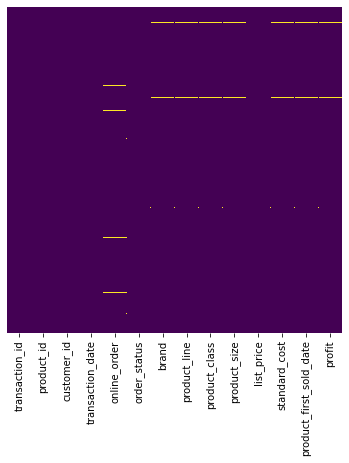

In [34]:
#heatmap showing null values

plt.figure(figsize=(6, 6))
sns.heatmap(trans.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [35]:
trans.dropna(axis = 0, inplace =  True)

In [36]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## New Customers List

In [37]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [38]:
#create an age column

#calculate the age from DOB

import datetime as dt
today = dt.datetime.today().year
ncl['age'] = today - ncl['DOB'].dt.year


In [39]:
ncl['age'] = ncl['age'].fillna(ncl.age.mode()[0])

In [40]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [41]:
ncl.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

<AxesSubplot:>

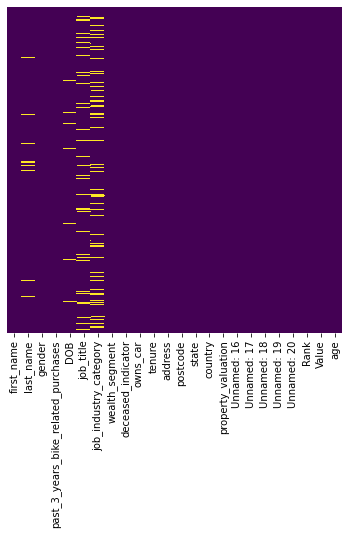

In [42]:
#heatmap showing null values

plt.figure(figsize=(6, 6))
sns.heatmap(ncl.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [43]:
ncl.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             189
Unnamed: 19                             323
Unnamed: 20                             324
Rank                                    324
Value                           

In [44]:
ncl.drop(['Unnamed: 20'], axis = 1, inplace = True)

## Creating the customers dataset

In [45]:
add_dem = pd.merge(cdem, cadd, on = 'customer_id', how = 'left')

In [46]:
customers = pd.merge(add_dem, trans, on = 'customer_id', how = 'left')

In [47]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 19941
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19942 non-null  int64         
 1   first_name                           19942 non-null  object        
 2   gender                               19942 non-null  object        
 3   past_3_years_bike_related_purchases  19942 non-null  int64         
 4   job_title                            17543 non-null  object        
 5   job_industry_category                16712 non-null  object        
 6   wealth_segment                       19942 non-null  object        
 7   deceased_indicator                   19942 non-null  object        
 8   owns_car                             19942 non-null  object        
 9   tenure                               19942 non-null  float64       
 10  age       

In [48]:
customers.customer_id.nunique()

3998

In [49]:
customers.transaction_date.max()

Timestamp('2017-12-30 00:00:00')

In [50]:
customers.transaction_date.isna().sum()

508

In [51]:
customers['recency'] = customers.transaction_date.max() - customers.transaction_date

In [52]:
customers.head()

customer_id first_name  gender  past_3_years_bike_related_purchases  \
0            1    Laraine  Female                                   93   
1            1    Laraine  Female                                   93   
2            1    Laraine  Female                                   93   
3            1    Laraine  Female                                   93   
4            1    Laraine  Female                                   93   

             job_title job_industry_category wealth_segment  \
0  Executive Secretary                Health  Mass Customer   
1  Executive Secretary                Health  Mass Customer   
2  Executive Secretary                Health  Mass Customer   
3  Executive Secretary                Health  Mass Customer   
4  Executive Secretary                Health  Mass Customer   

  deceased_indicator owns_car  tenure  ...  order_status           brand  \
0                  N      Yes    11.0  ...      Approved      OHM Cycles   
1                  N      Yes    11.0  ...      Approved           Solex   
2                  N      Yes    11.0  ...      Approved   Trek Bicycles   
3                  N      Yes    11.0  ...      Approved  Norco Bicycles   
4                  N      Yes    11.0  ...      Approved           Solex   

   product_line product_class product_size  list_price  standard_cost  \
0      Standard        medium       medium      235.63         125.07   
1      Standard        medium       medium     1577.53         826.51   
2          Road           low        small     1720.70        1531.42   
3      Standard        medium       medium      360.40         270.30   
4      Standard        medium       medium       71.49          53.62   

   product_first_sold_date  profit  recency  
0               2005-05-10  110.56   7 days  
1               2008-03-19  751.02 268 days  
2               2003-07-21  189.28 233 days  
3               2003-09-09   90.10 359 days  
4               2005-08-09   17.87 312 days  

[5 rows x 30 columns]

In [53]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 19941
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          19942 non-null  int64          
 1   first_name                           19942 non-null  object         
 2   gender                               19942 non-null  object         
 3   past_3_years_bike_related_purchases  19942 non-null  int64          
 4   job_title                            17543 non-null  object         
 5   job_industry_category                16712 non-null  object         
 6   wealth_segment                       19942 non-null  object         
 7   deceased_indicator                   19942 non-null  object         
 8   owns_car                             19942 non-null  object         
 9   tenure                               19942 non-null  float64        
 10

In [54]:
#creating a new dataframe
test = pd.DataFrame(customers, columns = ['customer_id','recency', 'product_id', 'profit'])

In [55]:
test = test.groupby('customer_id').aggregate({'recency' : 'min',
                                       'product_id' : 'count',
                                       'profit' : 'sum'})

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 1 to 4000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   recency     3490 non-null   timedelta64[ns]
 1   product_id  3998 non-null   int64          
 2   profit      3998 non-null   float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 124.9 KB


In [57]:
test.isna().sum()

recency       508
product_id      0
profit          0
dtype: int64

In [58]:
test.nunique()

recency        283
product_id      15
profit        3467
dtype: int64

In [59]:
test.dropna(axis = 0, inplace = True)
test.isna().sum()

recency       0
product_id    0
profit        0
dtype: int64

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 1 to 3500
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   recency     3490 non-null   timedelta64[ns]
 1   product_id  3490 non-null   int64          
 2   profit      3490 non-null   float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 109.1 KB


In [61]:
#convert recency to str
test['recency'] = test.recency.astype(str)
#remove the days
test['recency'] = test.recency.str.replace('days', '')

#convert back to integers
test['recency'] = test.recency.astype(int)

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 1 to 3500
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     3490 non-null   int32  
 1   product_id  3490 non-null   int64  
 2   profit      3490 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 95.4 KB


In [63]:
def r_score(days):
    """Function to determine R-score of customers who purchased recently
        the higher the value of the R score, the more recent they patronized
    """
    if days >= 88:
        return 1
    elif days <= 88 and days >= 45:
        return 2
    elif days <= 45 and days >= 18:
        return 3
    else:
        return 4

In [64]:
test['R_score'] = test['recency'].apply(r_score)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 1 to 3500
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     3490 non-null   int32  
 1   product_id  3490 non-null   int64  
 2   profit      3490 non-null   float64
 3   R_score     3490 non-null   int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 122.7 KB


In [66]:
def f_score(pid):
    """Function to determine f-score of customers who purchased recently
        the higher the value of the f score, the more recent they patronized
    """
    if pid > 7:
        return 4
    elif pid <= 7 and pid > 6:
        return 3
    elif pid <= 6 and pid > 4:
        return 2
    else:
        return 1

In [67]:
test['F_score'] = test.product_id.apply(f_score)

In [68]:
pq1 = test['profit'].quantile(q = 0.25)
pq2 = test['profit'].quantile(q = 0.50)
pq3 = test['profit'].quantile(q = 0.75)
pq4 = test['profit'].quantile(q = 1)

def m_score(profit):
    """Function to determine R-score of customers who purchased recently
        the higher the value of the R score, the more recent they patronized
    """
    if profit > pq3:
        return 4
    elif profit <= pq3 and profit > pq2:
        return 3
    elif profit <= pq2 and profit > pq1:
        return 2
    else:
        return 1

In [69]:
test['M_score'] = test.profit.apply(m_score)

In [70]:
test

recency  product_id   profit  R_score  F_score  M_score
customer_id                                                         
1                  7          11  3018.09        4        4        3
2                128           3  2226.26        1        1        2
3                102           7  3290.21        1        3        3
4                195           2   220.57        1        1        1
5                 16           6  2394.94        4        2        2
...              ...         ...      ...      ...      ...      ...
3496             256           4  2045.84        1        1        2
3497              52           3  1648.32        2        1        1
3498             127           6  3147.33        1        2        3
3499              51           7  4955.25        2        3        4
3500             144           6  1785.86        1        2        1

[3490 rows x 6 columns]

In [71]:
test = test.assign(RFM_value = lambda x: (100 * test['R_score'] + 10 * test['F_score'] + test['M_score']))

In [72]:
test.head(10)

recency  product_id   profit  R_score  F_score  M_score  \
customer_id                                                            
1                  7          11  3018.09        4        4        3   
2                128           3  2226.26        1        1        2   
3                102           7  3290.21        1        3        3   
4                195           2   220.57        1        1        1   
5                 16           6  2394.94        4        2        2   
6                 64           5  3946.55        2        2        3   
7                253           3   220.11        1        1        1   
8                 22           9  5364.39        3        4        4   
9                 78           6  2353.11        2        2        2   
10                43           5  3358.28        3        2        3   

             RFM_value  
customer_id             
1                  443  
2                  112  
3                  133  
4                  111  
5                  422  
6                  223  
7                  111  
8                  344  
9                  222  
10                 323

In [73]:
rq1 = test['RFM_value'].quantile(q=0.25)
rq2 = test['RFM_value'].quantile(q=0.50)
rq3 = test['RFM_value'].quantile(q=0.75)
rq4 = test['RFM_value'].quantile(q=0.1)

def title(rfm):
    
        if rfm > rq3:
            return 'Platinum'
        elif rfm <= rq3 and rfm >= rq2:
            return 'Gold'
        elif rfm <= rq2 and rfm >= rq1:
            return 'Silver'
        else:
            return 'Bronze'

In [74]:
#apply the above function to the dataframe

test['customer_title'] = test.RFM_value.apply(title)

In [75]:
test.head()

recency  product_id   profit  R_score  F_score  M_score  \
customer_id                                                            
1                  7          11  3018.09        4        4        3   
2                128           3  2226.26        1        1        2   
3                102           7  3290.21        1        3        3   
4                195           2   220.57        1        1        1   
5                 16           6  2394.94        4        2        2   

             RFM_value customer_title  
customer_id                            
1                  443       Platinum  
2                  112         Bronze  
3                  133         Bronze  
4                  111         Bronze  
5                  422       Platinum

In [76]:
test.to_csv('sprocket.csv', index = False)